In [22]:
# Data imports and such
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# http://stat-computing.org/dataexpo/2009/the-data.html

In [155]:
airports = pd.read_excel('airports new.xlt')
carriers  = pd.read_excel('carriers.xls')
carriers.columns = ['UniqueCarrier','Description']

In [12]:
airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


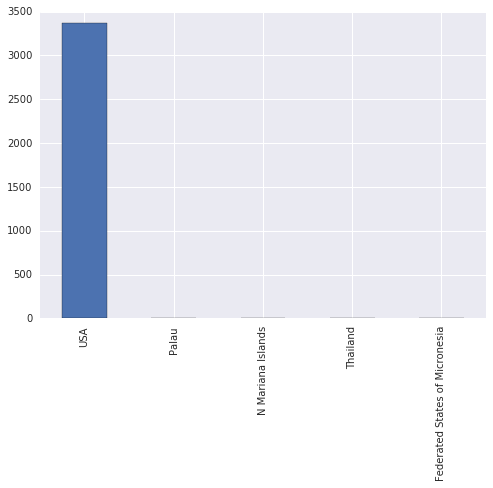

In [28]:
airports.country.value_counts().plot(kind='bar')

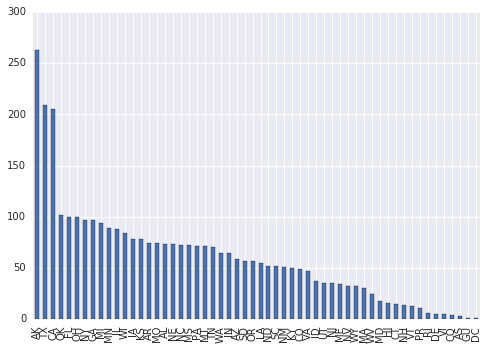

In [29]:
airports.state.value_counts().plot(kind='bar')

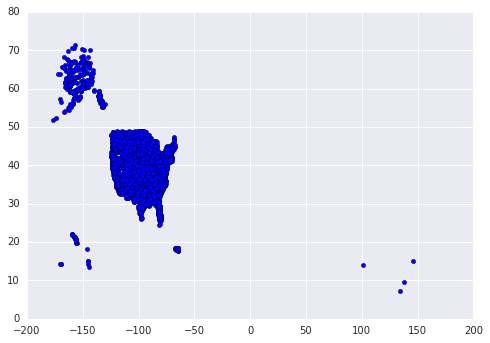

In [23]:
plt.scatter(airports.long,airports.lat)
plt.show()

In [59]:
carriers.dropna(how="all", inplace=True) 
carriers.head()
carriers.query("UniqueCarrier=='PS'")

,UniqueCarrier,Description
2055,PS,Pacific Southwest Airlines


In [71]:
trips_87 = pd.read_csv('Data/1987.csv')
trips_87.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1987,10,14,3,741.0,730,912.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1987,10,15,4,729.0,730,903.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1987,10,17,6,741.0,730,918.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1987,10,18,7,729.0,730,847.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1987,10,19,1,749.0,730,922.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [74]:
trips_87[[ u'Origin', u'Dest']]

,Origin,Dest
0,SAN,SFO
1,SAN,SFO
2,SAN,SFO
3,SAN,SFO
4,SAN,SFO
5,SAN,SFO
6,SAN,SFO
7,SAN,SFO
8,SAN,SFO
9,SAN,SFO


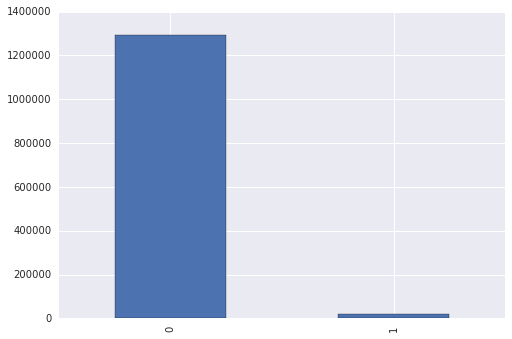

In [49]:
trips_87.Cancelled.value_counts().plot(kind='bar')

##### Potential questions:
* What are the weakest links in this network? (what can be measured in terms of network robustness?)
* Temporal trend
* What are the factors that influence weak performance (airlines, airports)?
* Are there geographical factors on bad performance?
* Can we predict delays in 2008 data based on delays on previous years?
* *STUDY MACHINE LEARNING!*

In [152]:
data = trips_87.merge(carriers,on='UniqueCarrier')
data.columns

Index([u'Year', u'Month', u'DayofMonth', u'DayOfWeek', u'DepTime',
       u'CRSDepTime', u'ArrTime', u'CRSArrTime', u'UniqueCarrier',
       u'FlightNum', u'TailNum', u'ActualElapsedTime', u'CRSElapsedTime',
       u'AirTime', u'ArrDelay', u'DepDelay', u'Origin', u'Dest', u'Distance',
       u'TaxiIn', u'TaxiOut', u'Cancelled', u'CancellationCode', u'Diverted',
       u'CarrierDelay', u'WeatherDelay', u'NASDelay', u'SecurityDelay',
       u'LateAircraftDelay', u'Description'],
      dtype='object')

In [124]:
print(len(data))
print(len(trips_87))

1311826
1311826


In [170]:
# Data from http://www.airportcodes.us/us-airports.htm
codes = pd.read_csv('Data/airport_codes.csv')
codes = codes.set_index('Code').to_dict()

In [172]:
data["origin_city"] = data["Origin"].map(codes['City'])
data["destin_city"] = data["Dest"].map(codes['City'])

In [189]:
data.columns

Index([u'Year', u'Month', u'DayofMonth', u'DayOfWeek', u'DepTime',
       u'CRSDepTime', u'ArrTime', u'CRSArrTime', u'UniqueCarrier',
       u'FlightNum', u'TailNum', u'ActualElapsedTime', u'CRSElapsedTime',
       u'AirTime', u'ArrDelay', u'DepDelay', u'Origin', u'Dest', u'Distance',
       u'TaxiIn', u'TaxiOut', u'Cancelled', u'CancellationCode', u'Diverted',
       u'CarrierDelay', u'WeatherDelay', u'NASDelay', u'SecurityDelay',
       u'LateAircraftDelay', u'Description', u'origin_city', u'destin_city',
       u'origin_lat', u'origin_long', u'destin_lat', u'destin_long'],
      dtype='object')

In [191]:
# Matrix, clustering?
delays = data.groupby(['origin_city','destin_city'])[['ArrDelay','DepDelay']].mean()

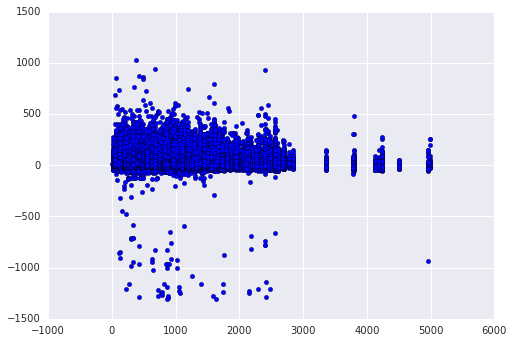

In [203]:
plt.scatter(data.Distance,data.ArrDelay)

In [159]:
airports = airports[['airport','city','lat','long']].set_index('city').to_dict()

In [182]:
data["origin_lat"] = data["origin_city"].map(airports['lat'])
data["origin_long"] = data["origin_city"].map(airports['long'])
data["destin_lat"] = data["destin_city"].map(airports['lat'])
data["destin_long"] = data["destin_city"].map(airports['long'])